<a href="https://colab.research.google.com/github/adamd1985/lectutures_on_AI/blob/main/Introduction_to_AI_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to AI and Machine Learning

All datasets used within our modules are available from: https://scikit-learn.org/stable/datasets/toy_dataset.html

## Supervised Models

### Linear Regression


We’re going to break down a simple code example, understand the imports, and dive into the purpose of each line.

Let's go through the code step-by-step.



These libraries will be your main tools for the lessons:

- NumPy is a library for handling numerical data in Python.
- matplotlib: Matplotlib is a plotting library, and  provides a simple interface for creating charts.
- sklearn: Scikit-Learn is a powerful machine learning library in Python that contains all algorithms we will need.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We fetch a public dataset, in this case the california housing data with these attributes:
- **MedInc**: median income in block group
- **HouseAge**: median house age in block group
- **AveRooms**: average number of rooms per household
- **AveBedrms**: average number of bedrooms per household
- **Population**: block group population
- **AveOccup**: average number of household members
- **Latitude**: block group latitude
- **Longitude**: block group longitude
- **MedHouseVal**: the median of the house value for each district and our target value.

In [ ]:
cali_housing = fetch_california_housing(as_frame=True)
df = cali_housing.frame
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11018,8.7496,29.0,7.935766,1.032117,2046.0,2.986861,33.77,-117.80,3.495
18865,3.1848,43.0,4.946429,0.900510,968.0,2.469388,38.11,-122.22,1.127
19723,1.7417,46.0,5.286885,1.073770,410.0,3.360656,38.85,-121.67,1.104


We want to predict the **MedHouseVal**.

To train the linear regression model, we first have to create a feature vector off all other attributes, except `MedHouseVal`. This is called `X`.
The vector with our target value is called `Y`.

`train_test_split` is a utility function commonly used to split the vectors into a train and test set. Here we leave 20% of the data to be unseen by the model, to be evaluated later.


In [ ]:
X = cali_housing.data
y = cali_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here we train our model using the train test splits created above.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

print("Coefficients (Beta1, Beta2,...BetaN):")
print(coefficients)
print("Intercept (Beta0):", model.intercept_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Coefficients (Beta1, Beta2,...BetaN):
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708
Intercept (Beta0): -37.02327770606409
Mean Squared Error (MSE): 0.5558915986952444
R-squared (R^2): 0.5757877060324508


Let's test on some known samples from the dataset:

| MedInc | HouseAge | AveRooms  | AveBedrms  | Population | AveOccup | Latitude | Longitude | MedHouseVal |
|--------|----------|-----------|------------|------------|----------|----------|-----------|-------------|
| 8.3252 | 41.0     | 6.984127  | 1.023810   | 322.0      | 2.555556 | 37.88    | -122.23   | 4.526       |
| 8.3014 | 21.0     | 6.238137  | 0.971880   | 2401.0     | 2.109842 | 37.86    | -122.22   | 3.585       |
| 7.2574 | 52.0     | 8.288136  | 1.073446   | 496.0      | 2.802260 | 37.85    | -122.24   | 3.521       |

From our lesson, we also provide the **MSE** using the API `mean_squared_error` from Scikit-Learn, we use this to validate the performance of the model.

In [ ]:
sample_data = {
    "MedInc": [8.3252, 8.3014, 7.2574],
    "HouseAge": [41.0, 21.0, 52.0],
    "AveRooms": [6.984127, 6.238137, 8.288136],
    "AveBedrms": [1.023810, 0.971880, 1.073446],
    "Population": [322.0, 2401.0, 496.0],
    "AveOccup": [2.555556, 2.109842, 2.802260],
    "Latitude": [37.88, 37.86, 37.85],
    "Longitude": [-122.23, -122.22, -122.24],
    "MedHouseVal": [4.526, 3.585, 3.521]
}

sample_df = pd.DataFrame(sample_data)
sample_y = sample_df["MedHouseVal"]
sample_X = sample_df.drop(columns=["MedHouseVal"])
y_sample_pred = model.predict(sample_X)


sample_df["Predicted (Y)"] = y_sample_pred
sample_df["Error (E)"] = sample_y - y_sample_pred

mse = mean_squared_error(sample_y, y_sample_pred)
print(f"\nMean Squared Error: {mse}")
print("Predicted vs Actual Values:")
sample_df


Mean Squared Error: 0.11167525745464281
Predicted vs Actual Values:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Predicted (Y),Error (E)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.151943,0.374057
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.999520,-0.414520
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.673580,-0.152580


Finally, we visualize the result of our model on the test data, which it has never seen. In general the predictions are close to the actual data points, with the exception of extreme values.

To avoid issues caused by extreme values, we do feature engineering and data cleaning. More of that in the lessons within this module.


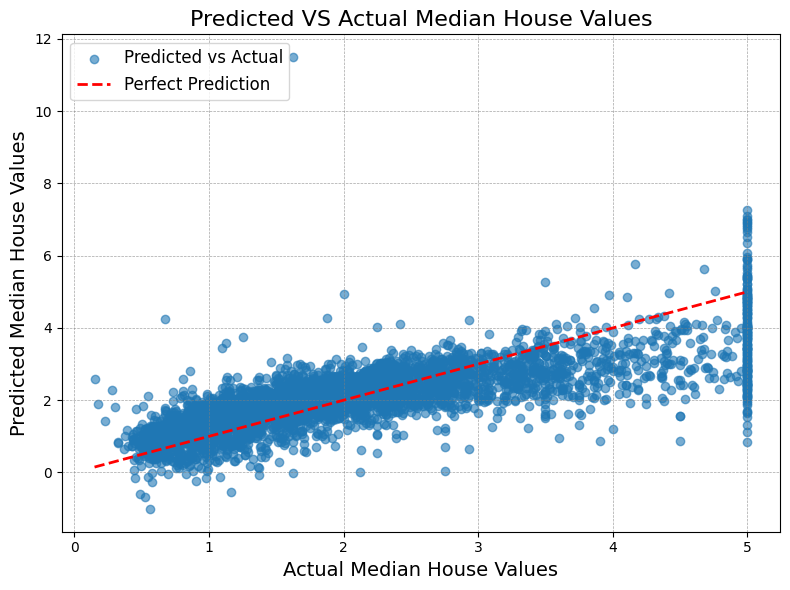

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.title('Predicted VS Actual Median House Values', fontsize=16)
plt.xlabel('Actual Median House Values', fontsize=14)
plt.ylabel('Predicted Median House Values', fontsize=14)

# Add grid, legend, and formatting
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()


### Logistic Regression

In this example, we will use logistic regression and its error functions. The imports are almost the same as the linear regression section, though we will get a new dataset, the widely used Iris dataset and APIs for a classification algorithm.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

The breast cancer dataset is one commonly used for binary  classification, and will be a good example for logistic regression. The dataset has 30 features, though we list the most used ones here:

- **mean radius**: Mean of distances from center to points on the perimeter
- **mean texture**: Standard deviation of gray-scale values
- **mean perimeter**: Mean size of the core tumor perimeter
- **mean area**: Mean size of the core tumor area
- **mean smoothness**: Mean of local variation in radius lengths                |
- Target: **0**: Malignant (Cancerous) or **1**: Benign (Non-Cancerous)


In [ ]:
breast_cancer = load_breast_cancer(as_frame=True)
X = breast_cancer.data
y = breast_cancer.target

breast_cancer.frame.sample(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
231,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,33.75,79.82,452.3,0.09203,0.1432,0.10890,0.02083,0.2849,0.07087,1
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.028820,0.1880,0.06471,...,17.81,91.38,545.2,0.14270,0.2585,0.09915,0.08187,0.3469,0.09241,1
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.028670,0.1668,0.06862,...,25.21,76.51,410.4,0.13350,0.2550,0.25340,0.08600,0.2605,0.08701,1


Same as linear regression, collect the features in `X`, the target in `y` and split into training and testing datasets.
Note for this particular model, we choose to scale the data. More on this feature engineering later.

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We train a logistic regression model here. Unlike linear regression, we evaluate the model using classification-specific metrics:

- **Accuracy**: The percentage of correctly predicted instances out of the total instances. For this dataset, accuracy is quite high, reflecting the model's effectiveness.
- **Precision**: The proportion of correctly predicted positive instances (**True Positives, TP**) out of all predicted positive instances, while **True Negatives (TN)** refer to correctly predicted negative cases.
- **Recall**: The proportion of correctly predicted positive instances (**TP**) out of all actual positive instances:
  $$
  \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$
- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure.


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

print("Coefficients (Beta1, Beta2,...BetaN):")
print(coefficients)
print("Intercept (Beta0):", model.intercept_[0])
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Coefficients (Beta1, Beta2,...BetaN):
                    Feature  Coefficient
0               mean radius    -0.431904
1              mean texture    -0.387326
2            mean perimeter    -0.393432
3                 mean area    -0.465210
4           mean smoothness    -0.071667
5          mean compactness     0.540164
6            mean concavity    -0.801458
7       mean concave points    -1.119804
8             mean symmetry     0.236119
9    mean fractal dimension     0.075921
10             radius error    -1.268178
11            texture error     0.188877
12          perimeter error    -0.610583
13               area error    -0.907186
14         smoothness error    -0.313307
15        compactness error     0.682491
16          concavity error     0.175275
17     concave points error    -0.311300
18           symmetry error     0.500425
19  fractal dimension error     0.616230
20             worst radius    -0.879840
21            worst texture    -1.350606
22          worst p

Using the **confusion matrix**, we analyze the following:
- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases (actual negative).
- **False Negatives (FN)**: Incorrectly predicted negative cases (actual positive).

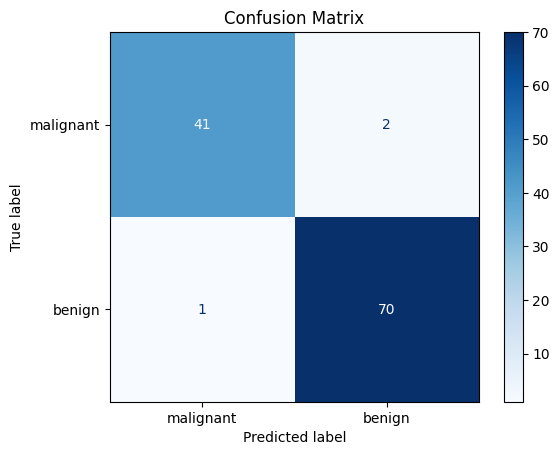

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, X_test_scaled, y_test, display_labels=breast_cancer.target_names, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

Logistic regression predicts probabilities for binary outcomes (0 or 1), therefore the threshold at which the model predicts class 1 versus class 0. We can visualize this with the following:

1. **Meshgrid Generation**: create a range of values for one feature (`xx`) and calculate the corresponding values for the second feature (`yy`) using the logistic regression equation: $X_2 = -\frac{(w_1 \cdot X_1 + b)}{w_2}$: This equation represents the decision boundary where the model predicts equal probabilities for both classes (0.5).

2. **Mapping Back to Original Space**: Since the model was trained on scaled data, the decision boundary is computed in the scaled space. We map it back to the unscaled feature space for better interpretability.

3. **Scatter Plot**: We plot the original data points using their true class labels (`y`) and distinguish between the two classes using colors.

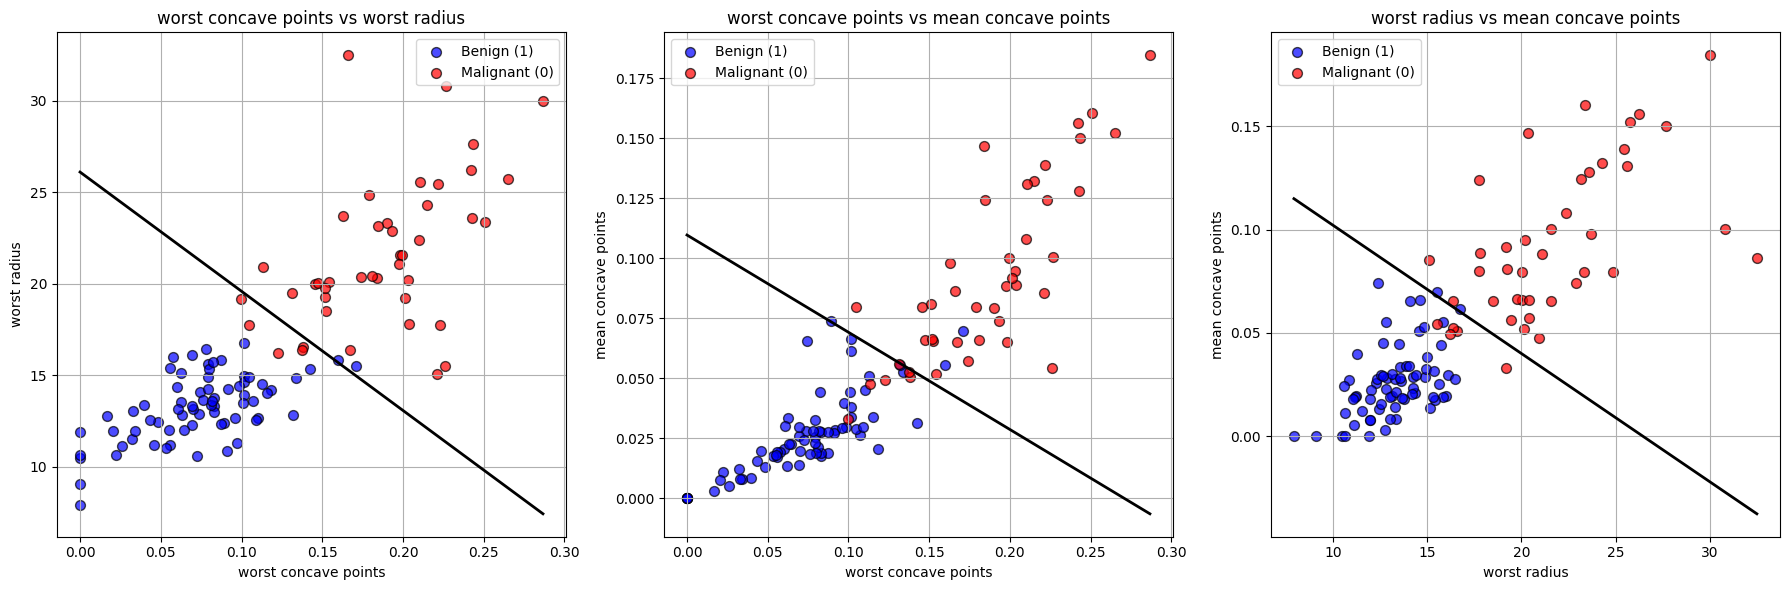

In [ ]:
def plot_decision_boundary(X, y, scaler, model,ax, idx1, idx2, feature_names):
    xx = np.linspace(X[:, idx1].min(), X[:, idx1].max(), 100)
    coef, intercept = model.coef_[0], model.intercept_[0]
    xx_scaled = (xx - scaler.mean_[idx1]) / scaler.scale_[idx1]
    yy = -(coef[idx1] * xx_scaled + intercept) / coef[idx2] * scaler.scale_[idx2] + scaler.mean_[idx2]

    ax.scatter(X[y == 1, idx1], X[y == 1, idx2], label="Benign (1)", c='blue', edgecolor="k", s=50, alpha=0.7)
    ax.scatter(X[y == 0, idx1], X[y == 0, idx2], label="Malignant (0)", c='red', edgecolor="k", s=50, alpha=0.7)
    ax.plot(xx, yy, 'k-', lw=2)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(f"{feature_names[0]} vs {feature_names[1]}")
    ax.legend(loc="best")
    ax.grid(True)

feature_names = list(X.columns)
feature_pairs = [
    (feature_names.index("worst concave points"), feature_names.index("worst radius"), ["worst concave points", "worst radius"]),
    (feature_names.index("worst concave points"), feature_names.index("mean concave points"), ["worst concave points", "mean concave points"]),
    (feature_names.index("worst radius"), feature_names.index("mean concave points"), ["worst radius", "mean concave points"]),
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)
for ax, (idx1, idx2, names) in zip(axes, feature_pairs):
    plot_decision_boundary(X_test.values, y_test, scaler, model, ax, idx1, idx2, names)
plt.show()


Given the size of the features, it is not feasible to construct a new row, therefore we will sample some test rows and validate their class.

In [ ]:
sample_indices = np.random.choice(len(X_test), 3, replace=False)
X_sample = X_test_scaled[sample_indices]
y_actual = y_test.iloc[sample_indices]
y_pred_sample = model.predict(X_sample)

print("\nSample Predictions:")
for i, idx in enumerate(sample_indices):
    print(f"Actual Class: {y_actual.iloc[i]}, Predicted Class: {y_pred_sample[i]}")
X_test.iloc[sample_indices]


Sample Predictions:
Actual Class: 1, Predicted Class: 1
Actual Class: 1, Predicted Class: 1
Actual Class: 1, Predicted Class: 1


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.95,20.72,77.79,441.2,0.10760,0.1223,0.09755,0.03413,0.2300,0.06769
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.2006,0.13840,0.06222,0.2679,0.07698
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.029500,0.1761,0.06540,...,14.42,21.95,99.21,634.3,0.12880,0.3253,0.34390,0.09858,0.3596,0.09166


### Decision Trees

For a decision tree, we import the APIs from Scikit-Learn, note how the tree has both a classifier and a regressor.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

We load again the breast cancer dataset. Note that this time, we don't need to scale it as decision trees can work with raw data.

In [ ]:
breast_cancer = load_breast_cancer(as_frame=True)
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
breast_cancer.frame.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


Train the classifyer, and compare with  the logistic regression metrics of:

```bash
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
```

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



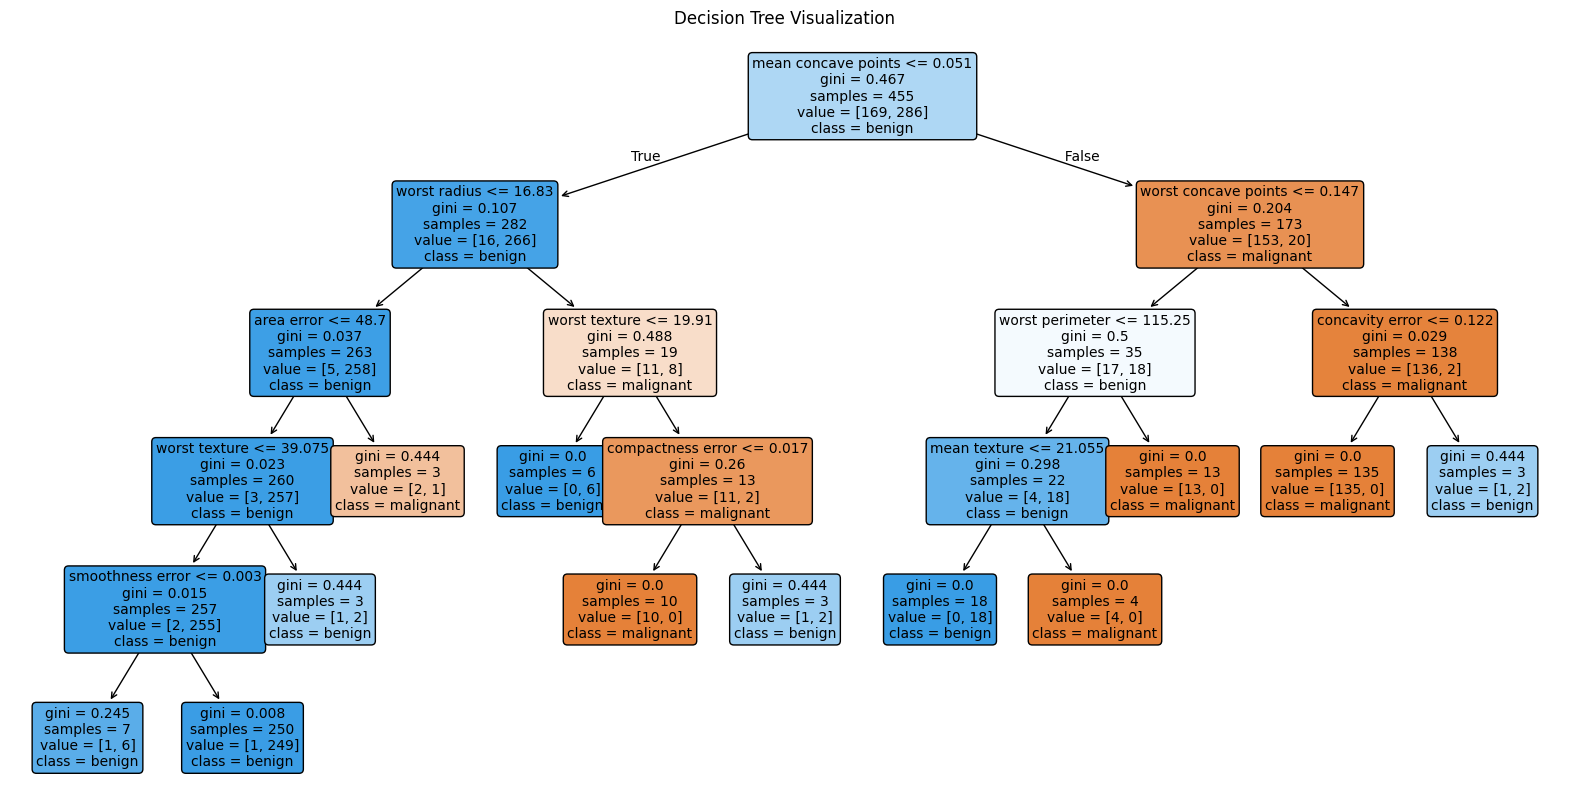

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=breast_cancer.feature_names,
    class_names=breast_cancer.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": breast_cancer.feature_names,
    "Importance": tree_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                    Feature  Importance
7       mean concave points    0.722145
27     worst concave points    0.068568
20             worst radius    0.054623
22          worst perimeter    0.053782
1              mean texture    0.032177
21            worst texture    0.031989
16          concavity error    0.012824
13               area error    0.012515
15        compactness error    0.010084
14         smoothness error    0.001291
18           symmetry error    0.000000
24         worst smoothness    0.000000
25        worst compactness    0.000000
19  fractal dimension error    0.000000
26          worst concavity    0.000000
28           worst symmetry    0.000000
23               worst area    0.000000
0               mean radius    0.000000
17     concave points error    0.000000
12          perimeter error    0.000000
11            texture error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000
8             mean s

Let's try it with a regresion on the california housing dataset.

In [ ]:
cali_housing = fetch_california_housing(as_frame=True)
X = cali_housing.data
y = cali_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a tree regressor. Compare the R2 and MSE with the Linear Regressor which were:

```bash
Mean Squared Error (MSE): 0.5558915986952444
R-squared (R^2): 0.5757877060324508
```

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=6)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 0.5844045983300754
R-squared (R^2): 0.5540288505085005


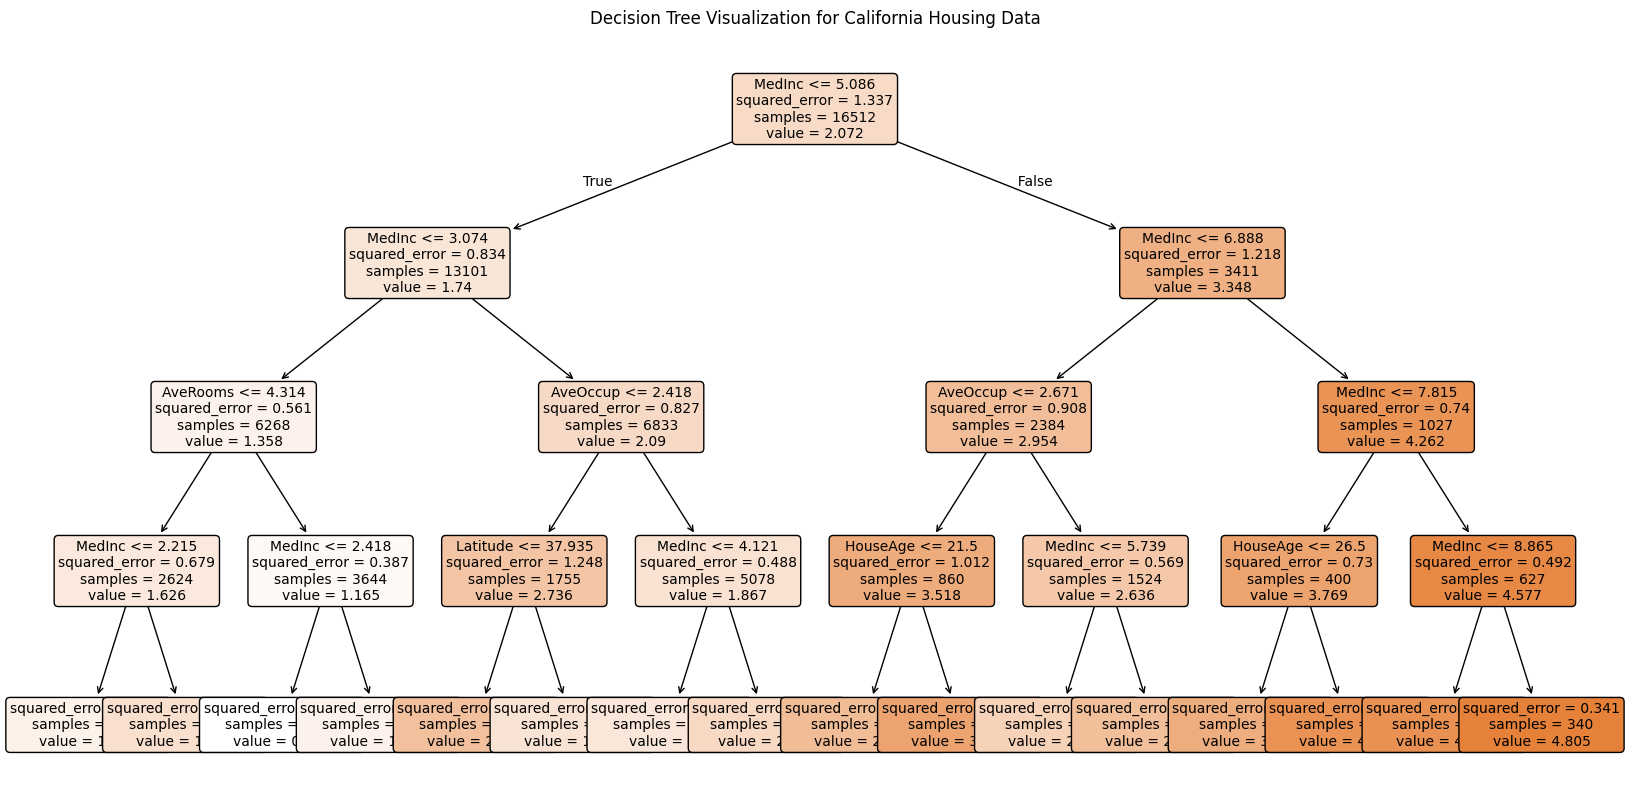


Feature Importance:
      Feature  Importance
0      MedInc    0.833422
5    AveOccup    0.108674
2    AveRooms    0.024919
6    Latitude    0.019672
1    HouseAge    0.013313
3   AveBedrms    0.000000
4  Population    0.000000
7   Longitude    0.000000


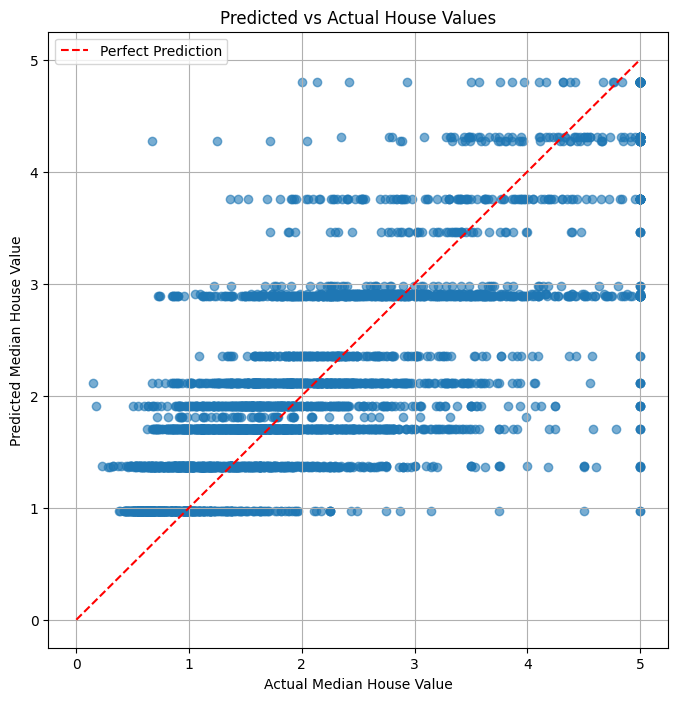

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization for California Housing Data")
plt.show()

# Analyze feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": tree_regressor.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Scatter plot to compare predictions vs actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 5], [0, 5], '--r', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual House Values")
plt.legend()
plt.grid(True)
plt.show()


### SVM

In [ ]:
from sklearn.svm import SVC

breast_cancer = load_breast_cancer(as_frame=True)
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



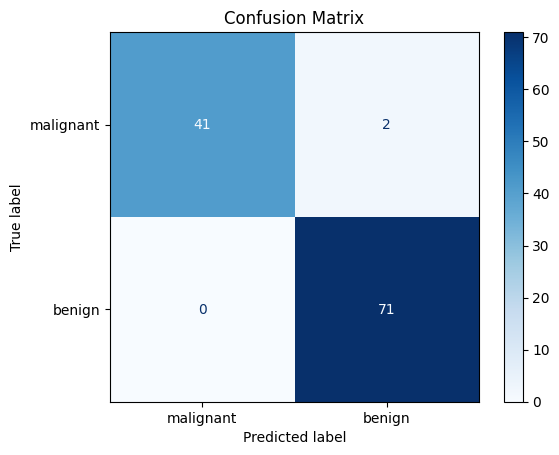

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test, y_test, display_labels=breast_cancer.target_names, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

For visualizing boundaries, we retrain the SVM on only 2 features and the target, this allows us to view the decision on a 2D plane. This is done only for educational purposes.

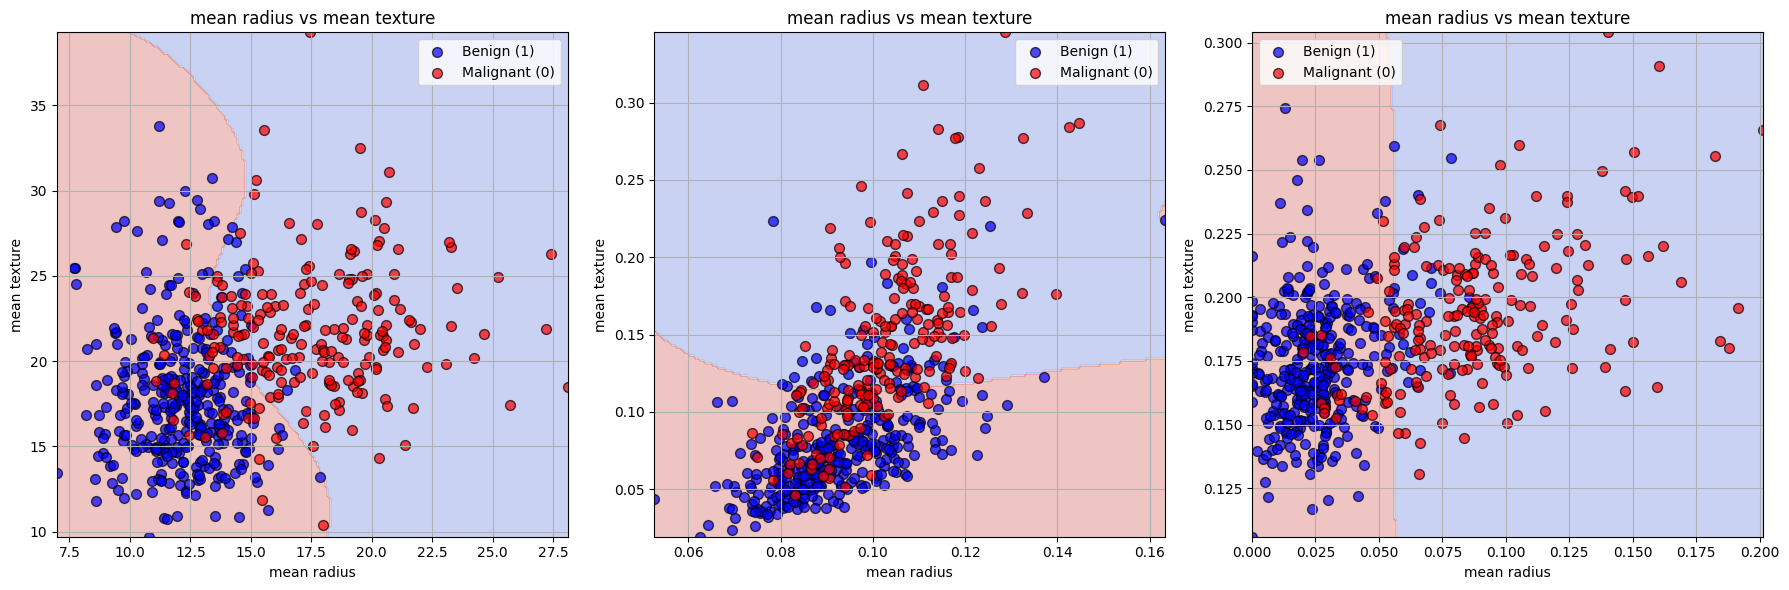

In [ ]:
def plot_svm_decision_boundary(X, y, model, ax, idx1, idx2, feature_names):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Benign (1)", c='blue', edgecolor="k", s=50, alpha=0.7)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Malignant (0)", c='red', edgecolor="k", s=50, alpha=0.7)

    ax.set_xlabel(feature_names[idx1])
    ax.set_ylabel(feature_names[idx2])
    ax.set_title(f"{feature_names[idx1]} vs {feature_names[idx2]}")
    ax.legend(loc="best")
    ax.grid(True)


feature_names = list(breast_cancer.feature_names)
feature_pairs = [
    (feature_names.index("mean radius"), feature_names.index("mean texture")),
    (feature_names.index("mean smoothness"), feature_names.index("mean compactness")),
    (feature_names.index("mean concave points"), feature_names.index("mean symmetry")),
]


fig, axes = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)
for ax, (idx1, idx2) in zip(axes, feature_pairs):
    X_subset = X.iloc[:, [idx1, idx2]].values

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_model.fit(X_train, y_train)

    plot_svm_decision_boundary(X_subset, y, svm_model, ax, 0, 1, feature_names)
plt.show()


## Unsupervised Learning Models

### KMeans

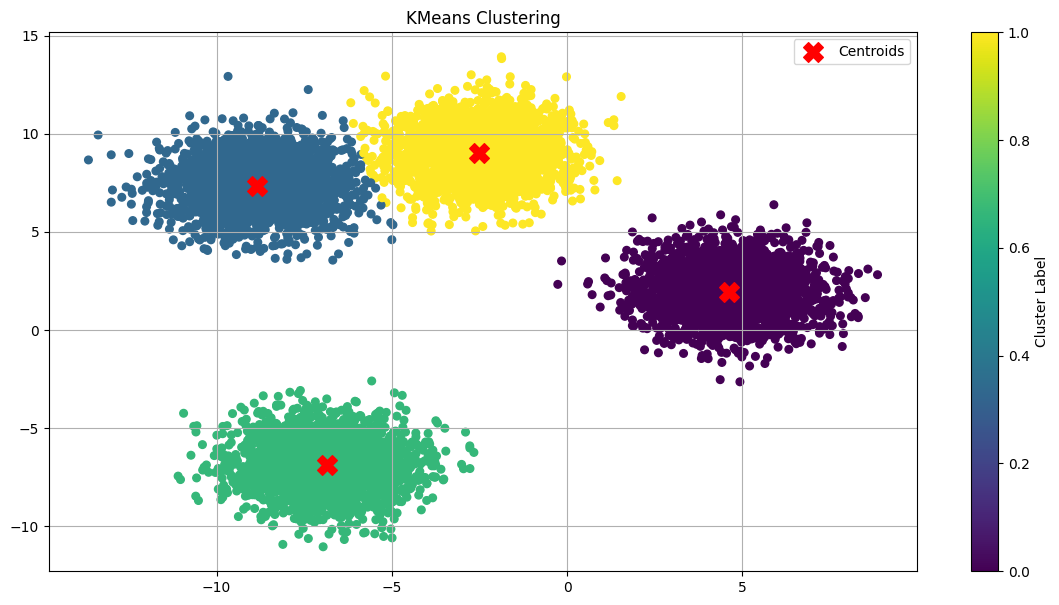

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=10000, centers=4, cluster_std=1.25, random_state=42)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.grid(True)
plt.show()



### DBScan

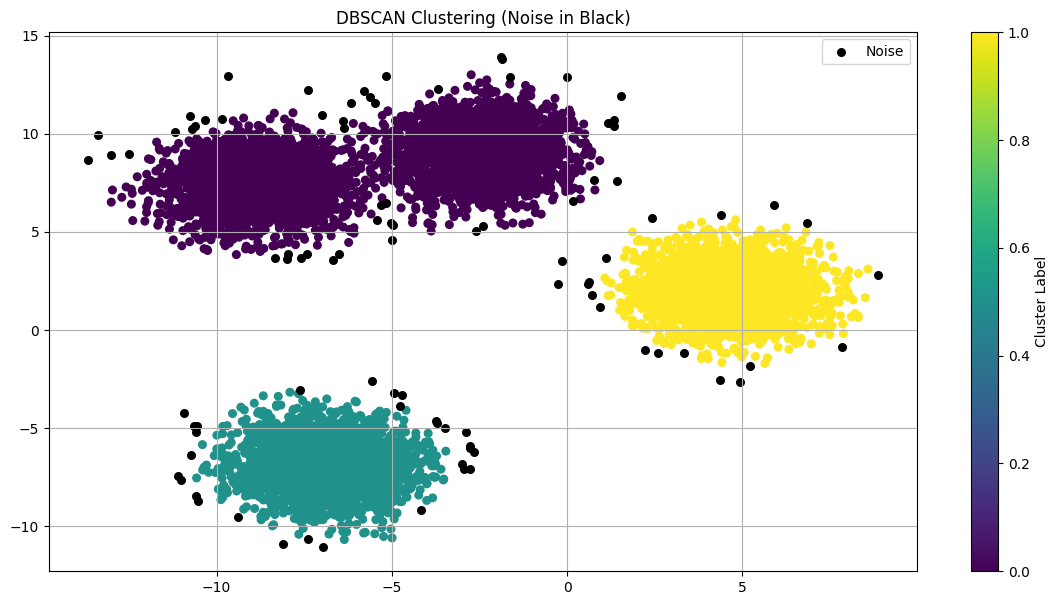

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(14, 7))


core_points = dbscan_labels != -1
noise_points = dbscan_labels == -1

plt.scatter(X[core_points][:, 0], X[core_points][:, 1], c=dbscan_labels[core_points], cmap='viridis', s=30, marker='o')
plt.scatter(X[noise_points][:, 0], X[noise_points][:, 1], color='black', s=30, label='Noise')
plt.title("DBSCAN Clustering (Noise in Black)")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.grid(True)
plt.show()



### PCA

We are using here the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris).

Iris Dataframe:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
149                5.9               3.0                5.1               1.8   

       Species  
149  virginica  


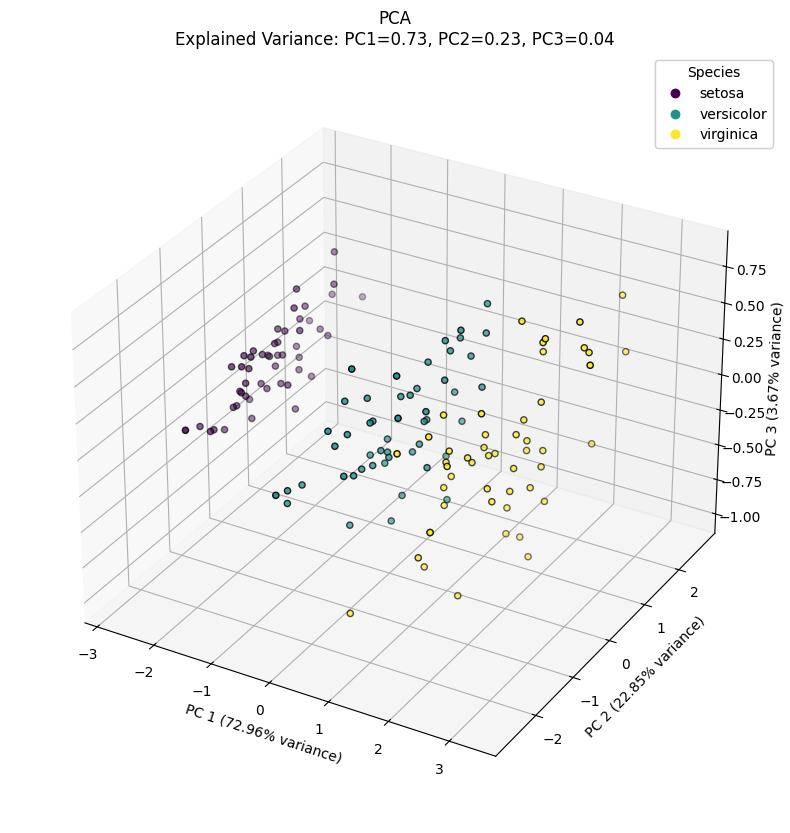

In [ ]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = datasets.load_iris()
data = iris.data
labels = iris.target
species_names = [iris.target_names[label] for label in labels]

df = pd.DataFrame(data, columns=iris.feature_names)
df['Species'] = species_names
print("Iris Dataframe:\n")
print(df.tail(1))

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_data)
explained_variance = pca.explained_variance_ratio_

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.95)
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='black')

ax.set_title(f"PCA\nExplained Variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f}, PC3={explained_variance[2]:.2f}")
ax.set_xlabel(f"PC 1 ({explained_variance[0]:.2%} variance)")
ax.set_ylabel(f"PC 2 ({explained_variance[1]:.2%} variance)")
ax.set_zlabel(f"PC 3 ({explained_variance[2]:.2%} variance)")

species_legend = [iris.target_names[label] for label in np.unique(labels)]
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=species_legend, title="Species")
ax.add_artist(legend1)

plt.show()


## Semi-Supervised Learning

SVM trained on labeled data only - Test Accuracy: 60.00%
SVM after Label Propagation - Test Accuracy: 68.89%


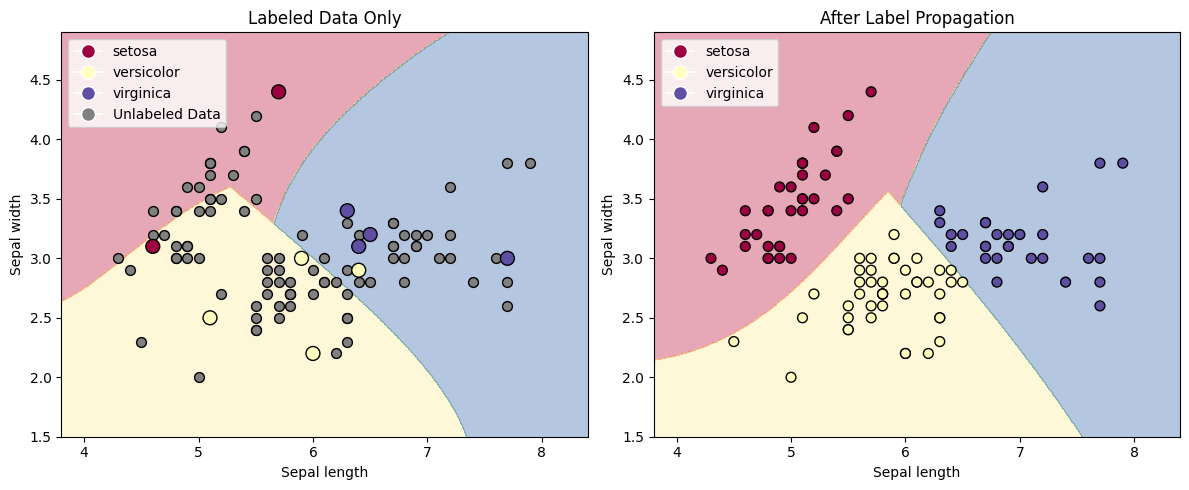

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.colors as mcolors

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
species = iris.target_names
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

rng = np.random.RandomState(42)
n_labeled_points = int(0.1 * len(y_train_full))
indices = rng.permutation(len(y_train_full))
unlabeled_set = indices[n_labeled_points:]
y_train = np.copy(y_train_full)
y_train[unlabeled_set] = -1

X_labeled = X_train_full[indices[:n_labeled_points]]
y_labeled = y_train_full[indices[:n_labeled_points]]
X_unlabeled = X_train_full[unlabeled_set]

clf = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovo')
clf.fit(X_labeled, y_labeled)
y_pred_labeled = clf.predict(X_test)
accuracy_labeled = accuracy_score(y_test, y_pred_labeled)
print(f'SVM trained on labeled data only - Test Accuracy: {accuracy_labeled * 100:.2f}%')

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z_labeled = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_labeled = Z_labeled.reshape(xx.shape)

label_prop_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)
label_prop_model.fit(X_train_full, y_train)
y_train_ssl = label_prop_model.transduction_

clf_ssl = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovo')
clf_ssl.fit(X_train_full, y_train_ssl)
y_pred_ssl = clf_ssl.predict(X_test)
accuracy_ssl = accuracy_score(y_test, y_pred_ssl)
print(f'SVM after Label Propagation - Test Accuracy: {accuracy_ssl * 100:.2f}%')

Z_ssl = clf_ssl.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ssl = Z_ssl.reshape(xx.shape)

cmap = plt.cm.Spectral
norm = mcolors.Normalize(vmin=0, vmax=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_labeled, alpha=0.4, cmap=cmap, norm=norm)
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='gray', label='Unlabeled Data', edgecolors='k', s=50)
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, cmap=cmap, norm=norm, edgecolors='k', s=100)
plt.title('Labeled Data Only')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=cmap(norm(i)), markersize=10, label=species[i]) for i in range(len(species))]
handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Unlabeled Data'))
plt.legend(handles=handles, loc='upper left')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_ssl, alpha=0.4, cmap=cmap, norm=norm)
plt.scatter(X_train_full[:, 0], X_train_full[:, 1], c=y_train_ssl, cmap=cmap, norm=norm, edgecolors='k', s=50)
plt.title('After Label Propagation')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=cmap(norm(i)), markersize=10, label=species[i]) for i in range(len(species))]
plt.legend(handles=handles, loc='upper left')

plt.tight_layout()
plt.show()


# Data Engineering

## Missing Data Handling

In [ ]:
data = {'ID': [1, 2, 3, 4, 5],
        'Age': [25, np.nan, 40, np.nan, 35],
        'Salary': [50000, 60000, 80000, 90000, 70000],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

mean_age = df['Age'].mean()
df_mean_imputed = df.copy()
df_mean_imputed['Age'] = df_mean_imputed['Age'].fillna(mean_age)
print("\nMean Imputed Data:")
print(df_mean_imputed)

median_age = df['Age'].median()
df_median_imputed = df.copy()
df_median_imputed['Age'] = df_median_imputed['Age'].fillna(median_age)
print("\nMedian Imputed Data:")
print(df_median_imputed)

mode_age = df['Age'].mode()[0]
df_mode_imputed = df.copy()
df_mode_imputed['Age'] = df_mode_imputed['Age'].fillna(mode_age)
print("\nMode Imputed Data:")
print(df_mode_imputed)

df_interpolated = df.copy()
df_interpolated['Age'] = df_interpolated['Age'].interpolate()
print("\nInterpolated Data:")
print(df_interpolated)


Original Data:
   ID   Age  Salary  Gender
0   1  25.0   50000    Male
1   2   NaN   60000  Female
2   3  40.0   80000    Male
3   4   NaN   90000  Female
4   5  35.0   70000    Male

Mean Imputed Data:
   ID        Age  Salary  Gender
0   1  25.000000   50000    Male
1   2  33.333333   60000  Female
2   3  40.000000   80000    Male
3   4  33.333333   90000  Female
4   5  35.000000   70000    Male

Median Imputed Data:
   ID   Age  Salary  Gender
0   1  25.0   50000    Male
1   2  35.0   60000  Female
2   3  40.0   80000    Male
3   4  35.0   90000  Female
4   5  35.0   70000    Male

Mode Imputed Data:
   ID   Age  Salary  Gender
0   1  25.0   50000    Male
1   2  25.0   60000  Female
2   3  40.0   80000    Male
3   4  25.0   90000  Female
4   5  35.0   70000    Male

Interpolated Data:
   ID   Age  Salary  Gender
0   1  25.0   50000    Male
1   2  32.5   60000  Female
2   3  40.0   80000    Male
3   4  37.5   90000  Female
4   5  35.0   70000    Male


## Outlier Removal

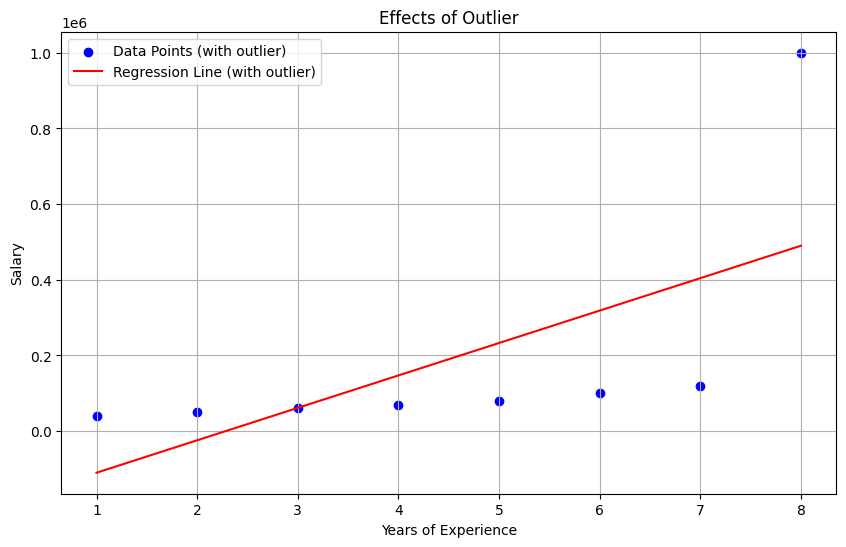

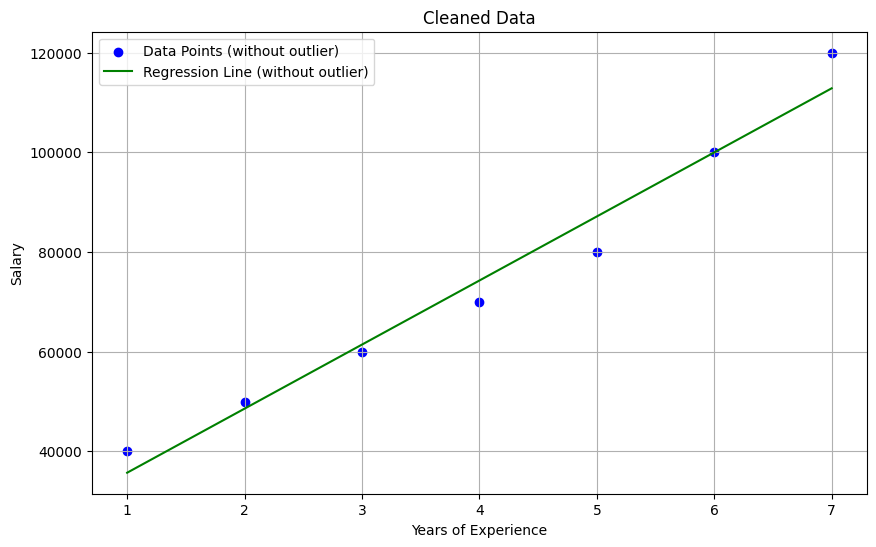

In [ ]:
from sklearn.linear_model import LinearRegression

salaries = np.array([40000, 50000, 60000, 70000, 80000, 100000, 120000, 1000000])  # The last value is an outlier
years_experience = np.array([1, 2, 3, 4, 5, 6, 7, 8])


X = years_experience.reshape(-1, 1)
y = salaries
model_with_outlier = LinearRegression()
model_with_outlier.fit(X, y)
y_pred_with_outlier = model_with_outlier.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(years_experience, salaries, color='blue', label='Data Points (with outlier)')
plt.plot(years_experience, y_pred_with_outlier, color='red', label='Regression Line (with outlier)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Effects of Outlier')
plt.legend()
plt.grid(True)
plt.show()


salaries_without_outlier = np.array([40000, 50000, 60000, 70000, 80000, 100000, 120000])  # Removing the outlier
years_experience_without_outlier = np.array([1, 2, 3, 4, 5, 6, 7])
X_without_outlier = years_experience_without_outlier.reshape(-1, 1)
y_without_outlier = salaries_without_outlier
model_without_outlier = LinearRegression()
model_without_outlier.fit(X_without_outlier, y_without_outlier)

y_pred_without_outlier = model_without_outlier.predict(X_without_outlier)

plt.figure(figsize=(10, 6))
plt.scatter(years_experience_without_outlier, salaries_without_outlier, color='blue', label='Data Points (without outlier)')
plt.plot(years_experience_without_outlier, y_pred_without_outlier, color='green', label='Regression Line (without outlier)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Cleaned Data')
plt.legend()
plt.grid(True)
plt.show()


###  Handling Categories

In [ ]:
data = {'Color': ['Red', 'Blue', 'Green', 'Red'],
        'Size': ['Medium', 'Small', 'Large', 'Large']}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

df_one_hot = pd.get_dummies(df, columns=['Color'])

print("\nOne-hot Encoded Data:")
print(df_one_hot)

df['Color_encoded'] = df['Color'].astype('category').cat.codes

print("\nLabel Encoded Data:")
print(df[['Color', 'Color_encoded']])


Original Data:
   Color    Size
0    Red  Medium
1   Blue   Small
2  Green   Large
3    Red   Large

One-hot Encoded Data:
     Size  Color_Blue  Color_Green  Color_Red
0  Medium       False        False       True
1   Small        True        False      False
2   Large       False         True      False
3   Large       False        False       True

Label Encoded Data:
   Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3    Red              2


### Imbalanced Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter


data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_imbalanced = RandomForestClassifier(random_state=42)
clf_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = clf_imbalanced.predict(X_test)
imbalanced_report = classification_report(y_test, y_pred_imbalanced, output_dict=True)

imbalanced_label_count = Counter(y_train)
print("Imbalanced Label Count:", imbalanced_label_count)
print("\nClassification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred_imbalanced))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)
y_pred_balanced = clf_balanced.predict(X_test)
balanced_report = classification_report(y_test, y_pred_balanced, output_dict=True)
balanced_label_count = Counter(y_train_resampled)

print("Balanced Label Count:", balanced_label_count)
print("\nClassification Report (Balanced Data with SMOTE):")
print(classification_report(y_test, y_pred_balanced))


Imbalanced Label Count: Counter({1: 249, 0: 149})

Classification Report (Imbalanced Data):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Balanced Label Count: Counter({1: 249, 0: 249})

Classification Report (Balanced Data with SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

